In [17]:
# Optimize a SVR with Newuoa algorithm 
# Import all bibs
import pdfo as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.svm import SVR
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics.pairwise import rbf_kernel
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error


In [18]:
# Set 70 datapoints with a testfunction
np.random.seed(1)
n = 70
lower = [-2.5,-1.5]
upper = [1.5,2.5]
x = np.column_stack((np.random.uniform(lower[0], upper[0], n), np.random.uniform(lower[1], upper[1], n)))
f = lambda x: 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))
y = f(x)

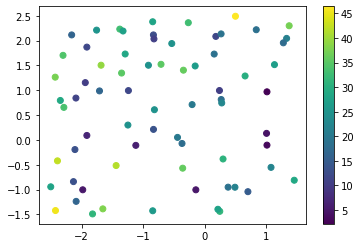

In [19]:

# Create a dataframe with the the datapoints
df = pd.DataFrame({'x.1': x[:, 0], 'x.2': x[:, 1], 'y': y})

# Create a color map using the viridis colors
cmap = cm.viridis

# Plot the points
plt.scatter(x=df['x.1'], y=df['x.2'], c=df['y'], cmap=cmap)
plt.colorbar()
plt.show()

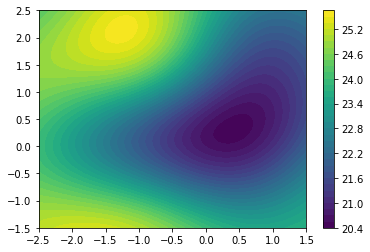

In [20]:
np.random.seed(1)

# Generate a SVR with the datapoints
model = SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1, tol=1e-3)
model.fit(x, y)

nplot_dim = 100

xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), 
                    np.linspace(lower[1], upper[1], nplot_dim))
xplot_flat = np.column_stack([xplot[0].ravel(), xplot[1].ravel()])
yplot = model.predict(xplot_flat)

# Plot the SVR
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


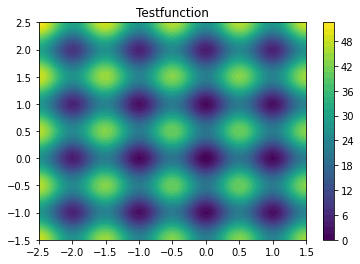

In [21]:
# Plot the testfunction 
yplot2 = f(xplot_flat)
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot2})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.title('Testfunction')
plt.show()


106.11982856019682
Optimal epsilon: 0.31923297579984256 Optimal C: 0.29102167471842927 Optimal tol: 0.41162838251079686


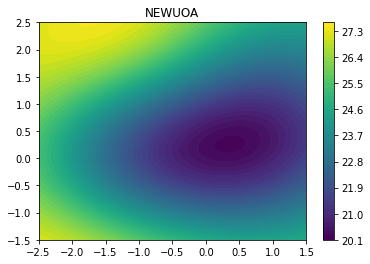

In [22]:
# Set target function
def svr_score(params):
    model = SVR( epsilon=10**params[0], C=10**params[1], tol=10**params[2])
    model.fit(x, y)
    yplot = model.predict(xplot_flat)
    return mean_squared_error(yplot2, yplot)

# Set target function to callable function
def objective_function(params):
    return svr_score(params)

np.random.seed(123)

# Define NEWUOA algorithm 
def newuoa_optimizer(fun, params, maxfev):
    initial_params = [ 0.1, 1.0, 1e-3] # Default value
    initial_params = params
    options = options = {'maxfev': maxfev}
    result = pf.pdfo(fun, initial_params, method='Newuoa', options=options)
    optimal_params = result.x  # Extract the optimal parameters from the result
    return optimal_params

print(svr_score([ 0.1, 1.0, 1e-3] ))

# Run NEWUOA algorithm to get optimal hyperparamter 
optimal_params = newuoa_optimizer(objective_function, [ 0.1, 1.0, 1e-3], 100)
epsilon_opt, C_opt, tol_opt = optimal_params
print('Optimal epsilon:',epsilon_opt,'Optimal C:', C_opt,'Optimal tol:', tol_opt)

# Define the SVM model with the optimal hyperparameters 
model = SVR(epsilon=10**epsilon_opt, C=10**C_opt, tol=10**tol_opt)
model.fit(x, y)


# Plot the optimized SVR
np.random.seed(1)
yplot = model.predict(xplot_flat)

df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.title('NEWUOA')
plt.show()


In [23]:


error = model.score(x, y)
mse = mean_squared_error(yplot2, yplot)
# ??
obj = model.dual_coef_
support_vectors = model.support_vectors_
K = rbf_kernel(support_vectors, support_vectors)
dual_coefficients = model.dual_coef_.ravel()
obj = 0.5 * np.dot(dual_coefficients, np.dot(K, dual_coefficients))
obj -= np.sum(dual_coefficients)

print("Fehlerwert:", error)
print(mse)
print("Objektivwert:", obj)

Fehlerwert: 0.0685129926320841
103.99976735479807
Objektivwert: 34.2942012459717


In [24]:
model = SVR(epsilon=10**2.97, C=10**0.84, tol=10**0.17)
model.fit(x, y)

np.random.seed(1)
yplot = model.predict(xplot_flat)

error = model.score(x, y)

# ??
# obj = model.dual_coef_
# support_vectors = model.support_vectors_
# K = rbf_kernel(support_vectors, support_vectors)
# dual_coefficients = model.dual_coef_.ravel()
# obj = 0.5 * np.dot(dual_coefficients, np.dot(K, dual_coefficients))
# obj -= np.sum(dual_coefficients)

print("Fehlerwert:", error)
print("Objektivwert:", obj)

Fehlerwert: -0.0146367639974736
Objektivwert: 34.2942012459717
